# Peter and Wolf Reinforcment Learning

This notebook explores the life of [peter and wolf](https://en.wikipedia.org/wiki/Peter_and_the_Wolf). Reinforcement learing will be used to let Peter Explore his environment, collect tasty apples and avoid meeting the wolf.

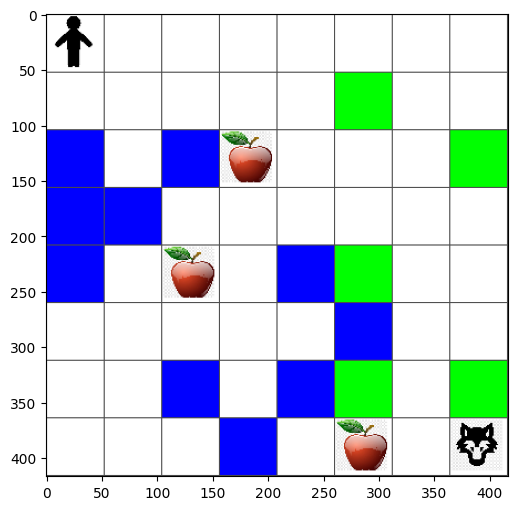

In [ ]:
# import the rlboard to show Peter's  environment.
from rlboard import *

width, height = 8, 8
m = Board(width, height)
m.randomize(seed=13)
m.plot()

### Goal: Find the apple while avoiding the wolf and other obstacles.

List of options: UP, Down, Right, Left.

In [4]:
actions = {"U": (0, 1), "D": (0, -1), "L":(-1, 0), "R": (1, 0)} # reference of coordinates using the cartesian plane logic.clear

action_idx = {a: i for i, a in enumerate(actions.keys())} # give a unique index for each action.
print(action_idx)

{'U': 0, 'D': 1, 'L': 2, 'R': 3}


Policy: a function that return the action of a given state.

Goal: eventually learn a good policy that will allow peter to move through the board safely.

Our policy in this case will be called random_walk

In [ ]:
def random_policy(m): 
    return random.choice(list(actions))

def walk(m, policy, start_position = None):
    n = 0 # number of steps

    # set the initial position.
    if start_position:
        m.human = start_position
    else: 
        m.random_start() # pick a random position on the board.
    
    while True:
        if m.at() == Board.Cell.apple:
            return n # success
        if m.at() in [Board.Cell.wolf, Board.Cell.water]:
            return -1 # eaten by the wolf or drowned.
        
        while True:
            a = actions[policy(m)]
            new_pos = m.move_pos(m.human, a)
            if m.is_valid(new_pos) and m.at(new_pos)!=Board.Cell.water:
                m.move(a) # do the actual move
                break
        
        n += 1

walk(m, random_policy)

66

The `walk` should return the length of the corresponding path, which will vary from one run to another.

## Run the walk a few number of times.


In [ ]:
def print_statistics(policy):
    success_move, eaten_wolf, get_apple = 0,0,0

    for _ in range(100):
        steps_to_reach_apple = walk(m, policy)

        if steps_to_reach_apple < 0:
            eaten_wolf +=1
        else:
            success_move += steps_to_reach_apple
            get_apple +=1
    
    print(f"Average path length = {success_move/get_apple}, eaten by wolf: {eaten_wolf} times")

print_statistics(random_policy)

Average path length = 33.02247191011236, eaten by wolf: 11 times


![Peter's moves](images/random_walk.gif)

In [ ]:
# Reward function.
move_reward = -0.1
goal_reward = 10
end_reward = -10

def reward(m, pos=None):
    pos = pos or m.human

    if not m.is_valid(pos):
        return end_reward
    x = m.at()
    if x == Board.Cell.water or x == Board.Cell.wolf:
        return end_reward
    if x == Board.Cell.apple:
        return end_reward
    
    return move_reward

# Q-LEARNING.

Policy is defined by a data structure called Q-table (multidimensional array).